# 자연어 처리

In [3]:
import pandas as pd
import numpy as np
import matplotlib

## 1. 토크나이징

In [4]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [5]:
from konlpy.tag import Okt

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.nouns(text)

print(result)


['분명', '배달', '완료', '나']


In [6]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ."
text2 = "나는 밥을 먹는다."

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm = True)
result3 = okt.pos(text2, stem = True)

print(result1)
print(result2)
print(result3)

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle'), ('.', 'Punctuation')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle'), ('.', 'Punctuation')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹다', 'Verb'), ('.', 'Punctuation')]


In [7]:
baeMin_data = pd.read_csv("data/배달의민족댓글.csv")
print(baeMin_data.info())
print(baeMin_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  463 non-null    int64 
 1   댓글          460 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.4+ KB
None
   Unnamed: 0                                                 댓글
0           0                                                NaN
1           1                                                NaN
2           2                                                NaN
3           3  80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4           4  음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
5           5  왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
6           6  배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는...
7           7  장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
8           8  B마트 이용중인데 언제부턴가 전체선택 버튼이 비활성화되어있습니다. 장바구니에 있는것...
9           9  수저포크x 버튼 기본으로 활성

In [8]:
print(baeMin_data.isna())
print(baeMin_data.isna().sum())

     Unnamed: 0     댓글
0         False   True
1         False   True
2         False   True
3         False  False
4         False  False
..          ...    ...
458       False  False
459       False  False
460       False  False
461       False  False
462       False  False

[463 rows x 2 columns]
Unnamed: 0    0
댓글            3
dtype: int64


In [9]:
baeMin_data.dropna(axis = 0, how = 'any', inplace = True)

print(baeMin_data.isna())
print(baeMin_data.isna().sum())

     Unnamed: 0     댓글
3         False  False
4         False  False
5         False  False
6         False  False
7         False  False
..          ...    ...
458       False  False
459       False  False
460       False  False
461       False  False
462       False  False

[460 rows x 2 columns]
Unnamed: 0    0
댓글            0
dtype: int64


In [10]:
print(baeMin_data.head(10))

    Unnamed: 0                                                 댓글
3            3  80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4            4  음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
5            5  왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
6            6  배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는...
7            7  장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
8            8  B마트 이용중인데 언제부턴가 전체선택 버튼이 비활성화되어있습니다. 장바구니에 있는것...
9            9  수저포크x 버튼 기본으로 활성화 되어있는거 환경 보호한다고 해놓은거 압니다. 그런데...
10          10  개선이되고 업데이트가 된다는건 불편했던 사항들을 반영하는것 아닌가요? 오히려 더 불...
11          11  사용자만 볼 수있는 배달시켰던 가게들에 대한 메모기능?이랑 언제 몇번 먹었다 같은걸...
12          12  저는 알뜰이나 한집배달이용을 원치않는데 가게검색시에는 가게배달은 선택할수가없네요. ...


In [11]:
# 첫 번째 댓글 가져오기

text1 = str(baeMin_data.iloc[0]['댓글'])
print(text1)
result1 = okt.pos(text1)
print(result1)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'N

In [12]:
# 처음부터 다섯개의 댓글 가져오기

for comment in baeMin_data.iloc[:5]['댓글'] :
    sum_result = []
    comment_result = okt.pos(comment)
    for word, pos in comment_result :
        if (pos == 'Noun') :
            sum_result.append(word)
    print(sum_result)

['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체', '대한', '평점', '점', '식사', '항상', '추구', '평점', '속', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '

In [13]:
text = "오늘!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ㅇㅇ너무 hello HELLO 010-6695-2653  기분 좋아^^ ㅎㅇㅎㅇ"

import re
# new_text = re.sub("[^0-9]", "", text)
new_text = re.sub("[^0-9a-zA-Z가-힣!-=\s+-]", "", text)
print(new_text)

오늘!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 너무 hello HELLO 010-6695-2653  기분 좋아 


In [14]:
# 워드 클라우드
# 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list 에 담는 것
# 조건1 : 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2 : 불용어 제거 (stopwords)

# 최종 출력 list
word_list = []

# 불용어
stopwords = ["배민", "민족", "배달", "배달의민족"]

for review in baeMin_data['댓글'].tolist() :
    review = re.sub("[ㄱ-ㅎㅏ-ㅣ\s!@#$%^&*()]", "", review)
    review_list = okt.nouns(review)
    
    for rev in review_list :
        if (len(rev) != 1) & (rev not in stopwords) :
            word_list.append(rev)

print(word_list)
    

['로딩', '이미지', '안정', '네트워크', '상황', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '주문', '역정보', '코로나', '때문', '서버', '취소', '꼼짝', '음식', '우리나라', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '아예', '현금', '결제', '옵션', '음식', '우리나라', '강국', '무슨', '핸드폰', '번호', '인증', '카드', '인증', '등불', '게스', '사용', '저녁', '먹음', '외국', '거주', '방법', '해외', '카드', '결제', '업데이트', '사용', '점점', '클릭', '한번', '고더', '결제', '기본', '저쪽', '구석', '고마치', '유도', '메인', '잘못', '클릭', '자꾸나', '일반', '결제', '다시', '클릭', '결제', '요청', '사항', '리뷰', '이벤트', '때또', '클릭', '정말', '자체', '식사', '후맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '문건', '주문', '입장', '식당', '도대체', '맛집', '탐색', '자체', '대한', '평점', '식사', '항상', '추구', '평점', '해이', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '구안', '장바구니', '마트', '여러가지', '고스', '크롤', '살짝', '대각선', '포장', '용량', '좌우', '고비', '마트', '항목', '다시', '체크', '상태', '로딩', '위로', '전체', '선택', '살짝', '직선', '옆항목', '포장', '마트', '용량', '등항목', '선택', '해도', '필요', '거의', '일배', '민어', '플사', '마트', '이용', '언제', '가전체', '선택', '버튼

In [15]:
import collections

In [16]:
count_words = collections.Counter(word_list)

print(count_words)
print(count_words.most_common(30))

Counter({'주문': 202, '가게': 155, '메뉴': 139, '기능': 108, '리뷰': 101, '시간': 98, '고객': 95, '결제': 92, '음식': 84, '어플': 81, '검색': 76, '취소': 75, '업데이트': 67, '사용': 65, '센터': 64, '전화': 60, '쿠폰': 56, '연결': 55, '문제': 52, '선택': 48, '계속': 48, '생각': 47, '진짜': 46, '확인': 45, '추가': 43, '상담': 42, '요청': 40, '개선': 39, '설정': 38, '매장': 38, '사항': 36, '식당': 36, '사람': 35, '경우': 34, '삭제': 33, '기본': 32, '포장': 32, '화면': 32, '서비스': 32, '한번': 30, '라이더': 30, '사진': 30, '그냥': 29, '이용': 28, '버튼': 28, '처음': 28, '정말': 27, '사용자': 27, '채팅': 27, '직접': 27, '배차': 27, '시스템': 27, '음식점': 27, '연락': 27, '다시': 26, '알뜰': 26, '다른': 26, '할인': 26, '기사': 25, '목록': 25, '자체': 24, '위치': 24, '잘못': 23, '하나': 23, '부분': 23, '혜택': 23, '때문': 22, '정도': 22, '해도': 22, '광고': 22, '지도': 22, '문의': 21, '보고': 21, '주소': 21, '입력': 21, '항상': 20, '장바구니': 20, '전체': 20, '이번': 20, '이안': 20, '도안': 20, '별로': 20, '카드': 19, '점점': 19, '마트': 19, '보기': 19, '답변': 19, '가요': 19, '사장': 19, '찾기': 19, '이벤트': 18, '자주': 18, '최악': 18, '지연': 18, '로그인': 18, '오류': 18, '방법': 17, '크롤':

In [17]:
from matplotlib import font_manager

search_pont = "gothic"

for font in font_manager.findSystemFonts() :
    font_info = font_manager.FontProperties(fname = font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_pont in font_name.lower() :
        print(font_name, font_path)

Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Franklin Gothic Medium C:\Windows\Fonts\framdit.ttf
Showcard Gothic C:\Windows\Fonts\SHOWG.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
MS Gothic C:\Windows\Fonts\msgothic.ttc
Franklin Gothic Demi Cond C:\Windows\Fonts\FRADMCN.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
NanumGothic C:\Windows\Fonts\EXTRABOLD.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Copperplate Gothic Bold C:\Win

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image

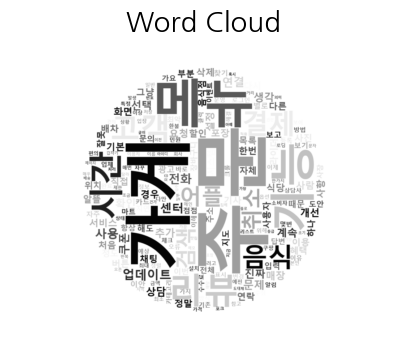

In [19]:
mask_img = np.array(Image.open("pictures/circle.png"))

wc = WordCloud(
    font_path = "C:\Windows\Fonts\malgunbd.ttf",
    mask = mask_img,
    background_color = 'white',
    colormap = 'gist_gray',
    width = 800,
    height = 400
)

wc.generate_from_frequencies(count_words)

plt.figure(figsize = (5, 5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize = 20)
plt.show()

['깨다', '나오다', '누르다', '않다', '건지다', '모르다', '기다리다', '먹다', '돼다', '시키다', '깔다', '시키다', '먹다', '시키다', '하다', '하다', '바뀌다', '바뀌다', '밀리다', '들다', '놓다', '가다', '하다', '들다', '하다', '하다', '바뀌다', '자다', '이뤄지다', '넘다', '남기다', '하다', '해내다', '바라다', '줄이다', '올리다', '내리다', '움직이다', '넘어가다', '버리다', '넘어오다', '두다', '되어다', '올라가다', '되다', '벗어나다', '늘다', '쓸다', '누르다', '되다', '넘다', '하다', '느끼다', '되어다', '하다', '내다', '누르다', '떼다', '되다', '되다', '넘어가다', '보다', '되어다', '놓다', '바꾸다', '해주다', '열다', '되어다', '까먹다', '하다', '바꾸다', '해주다', '먹다', '받다', '보다', '먹다', '가져오다', '만들다', '되다', '되다', '보이다', '보이다', '하다', '찾다', '찾다', '나오다', '보다', '시키다', '먹다', '보다', '시키다', '먹다', '하다', '이다', '시키다', '먹다', '이다', '잘알다', '하다', '가다', '하다', '지다', '싸다', '식다', '오다', '집다', '차다', '해주다', '하다', '하다', '하다', '하다', '늦다', '늦다', '하다', '모르다', '이다', '하다', '잡히다', '해주다', '해주다', '하다', '적다', '나다', '들다', '들다', '되다', '건지다', '없어지다', '써다', '오다', '하다', '겠다', '하다', '들다', '찌다', '놓다', '많아지다', '보다', '사라지다', '생기다', '걸다', '하다', '들다', '하다', '되어다', '받다', '걸다', '보다', '하다', '되다', '받다', '않다', '기다리다', '서다

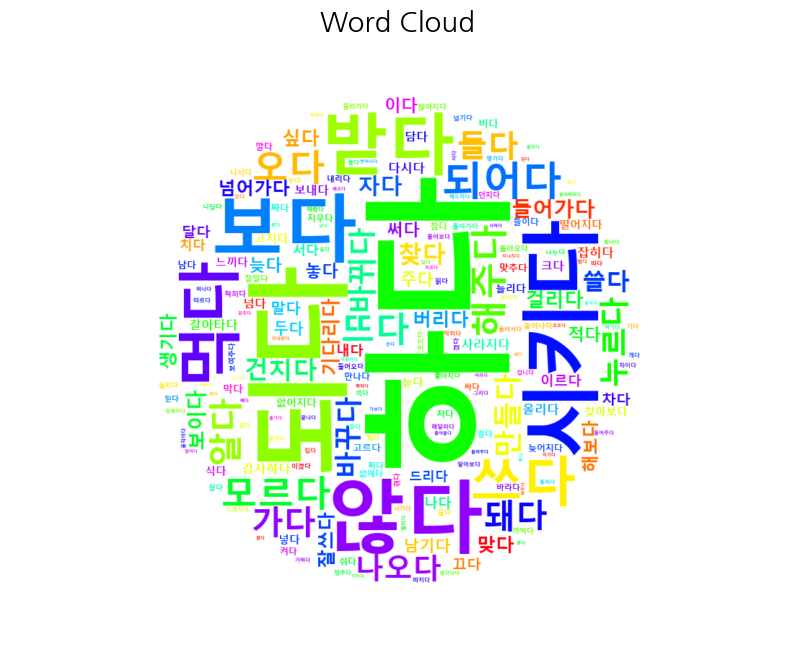

In [20]:
# 배달의 민족 댓글 "동사" 에 대한 워드 클라우드
# norm, stem
# 조건은 동일
# gpt 이용해서 새로운 마스크 만들어보고 적용해보기

# 최종 출력 list
verb_list = []

for review in baeMin_data['댓글'].tolist() :
    review = re.sub("[ㄱ-ㅎㅏ-ㅣ\s!@#$%^&*()]", "", review)
    review_list = okt.pos(review, stem = True)
    
    for rev, pos in review_list :
        if (len(rev) != 1) & (pos == 'Verb'):
            verb_list.append(rev)

print(verb_list)

# counter
count_verbs = collections.Counter(verb_list)

print(count_verbs)
print(count_verbs.most_common(30))

# WC

wc = WordCloud(
    font_path = "C:\Windows\Fonts\malgunbd.ttf",
    mask = mask_img,
    background_color = 'white',
    colormap = 'gist_rainbow_r',
    width = 800,
    height = 400
)

wc.generate_from_frequencies(count_verbs)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize = 20)
plt.show()
    

## 5) 검색

In [21]:
# 명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?
# '취소' 단어가 있는 문장들만 검색

baeMin_data.loc[baeMin_data['댓글'].str.contains("취소"), : ]

,Unnamed: 0,댓글
3,3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
17,17,편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워...
30,30,응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 ...
35,35,최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필...
36,36,최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키...
44,44,배민원에서 주문하고 배차가 한시간 넘게 걸린데서 취소요청하니 가게에 먼저 요청하고 ...
46,46,아니. 배달라이더가 안잡히면 가게 사장님들이 취소할 수 있도록 해놓던지. 배달 라이...
52,52,배달원 부족하면 애초에 주문이 어렵다 문구를 해놔야하는거 아니냐 뭔 옆동네에서 조리...
55,55,배빈1으로 1시간 넘게 음식을 못받았습니다. 고객센터도 연락 잘 안되고 잘 안되는 ...
71,71,상담사 연결 진짜 안되구요 유선연결은 고사하고 채팅상담도 안됩니다. 배달음식 시킨데...


In [23]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"

for res, score in kiwi.analyze(text, top_n=5) :
    print(score, review_list, sep="\t")

-65.28563690185547	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-69.0050277709961	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-69.7073745727539	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-73.4267578125	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-73.45321655273438	[('

In [25]:
result = kiwi.tokenize(text)

for res in result :
    print(res.form)

분명
배달
이
완료
되
었
는데
나
는
받
지
않
었
어


In [26]:
# 명사만 추출

for res in result :
    if res.tag[0] == "N" :
        print(res.form, res.tag)

배달 NNG
완료 NNG
나 NP


In [ ]:
data2 = pd.read_csv("data/배달의민족댓글2.csv")
data2.head()

,Unnamed: 0,댓글
0,3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,5,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,6,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,7,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [38]:
# 빈 리스트 만들기 main_list
# 댓글을 반복문으로 하나씩 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# sub_list 에 명사 단어들 담기
# main_list 에 sub_list 담기

main_list = []

for review in baeMin_data['댓글'].tolist() :
    review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    result = kiwi.tokenize(review)
    sub_list = []

    for res in result :
        if (res.tag[0] == 'N') & (len(res.form) > 1) :
            sub_list.append(res.form)
    
    main_list.append(sub_list)

print(main_list)

[['주문', '취소', '주문', '내역', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '무한', '로딩', '진행', '주문', '내역', '정보', '정확', '코로나', '때문', '서버', '안정', '결국', '취소'], ['음식', '하나', '우리나라', '국내', '번호', '필요', '번호', '인증', '필수', '카드', '결제', '선택', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '현금', '결제', '옵션', '음식', '하나', '나라', '우리', '나라', '강국', '핸드폰', '번호', '인증', '카드', '인증', '불편', '스탭', '사용', '짜증', '저녁', '외국', '거주자', '방법', '해외', '카드', '결제'], ['업데이트', '사용', '불편', '클릭', '일반', '결제', '기본', '구석', '배달', '유도', '메인', '클릭', '일반', '결제', '클릭', '이제', '결제', '요청', '사항', '리뷰', '이벤트', '클릭', '배민'], ['배달', '민족', '자체', '만족', '식사', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '별점', '주문', '건수', '기대', '주문자', '입장', '식당', '대체', '정확', '탐색', '자체', '평점', '식사', '추구', '기대', '평점', '애석', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법'], ['장바구니', '불편', '마트', '가지', '스크롤', '대각선', '배달', '포장', '용량', '특가', '좌우', '마트', '항목', '체크', '상태', '로딩', '전체', '선택', '직선', '항목', '짜증', '배달', '포장', '마트', '용량', '특가', '항목', '선택', '화면', '필요', '어플', 